# RDS HW2

Install the Data Synthesizer library.

In [ ]:
!pip install DataSynthesizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import normalize_given_distribution, read_json_file, pairwise_attributes_mutual_information, mutual_information, set_random_seed

from IPython.display import clear_output
from scipy.stats import entropy, ks_2samp
from scipy.spatial.distance import euclidean
from sklearn.metrics import mutual_info_score
from random import randint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
def generate_data_A(input_data_file, output_data_size, seed=None):
    seed = seed or randint(0, 2**30)
    description_file = description_files['A']

    describer = DataDescriber()
    describer.describe_dataset_in_random_mode(input_data_file, seed=seed)
    describer.save_dataset_description_to_file(description_file)

    generator = DataGenerator()
    generator.generate_dataset_in_random_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

In [ ]:
def generate_data_B(input_data_file, output_data_size, epsilon=0.1, seed=None):
    seed = seed or randint(0, 2**30)
    description_file = description_files['B']

    describer = DataDescriber()
    describer.describe_dataset_in_independent_attribute_mode(input_data_file, epsilon=epsilon, seed=seed)
    describer.save_dataset_description_to_file(description_file)

    generator = DataGenerator()
    generator.generate_dataset_in_independent_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

In [ ]:
def generate_data_CD(input_data_file, output_data_size, description_file, epsilon=0.5, k=1, seed=None):
    seed = seed or randint(0, 2**30)

    describer = DataDescriber()
    describer.describe_dataset_in_correlated_attribute_mode(input_data_file, k=k, epsilon=epsilon, seed=seed)
    describer.save_dataset_description_to_file(description_file)

    generator = DataGenerator()
    generator.generate_dataset_in_correlated_attribute_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

def generate_data_C(input_data_file, output_data_size, epsilon=0.1, seed=None):
    return generate_data_CD(input_data_file, output_data_size, description_files['C'], epsilon, k=1, seed=seed)

def generate_data_D(input_data_file, output_data_size, epsilon=0.1, seed=None):
    return generate_data_CD(input_data_file, output_data_size, description_files['D'], epsilon, k=2, seed=seed)

Start with a real dataset __hw_compas__ and a fake dataset __hw_xyz__. Generate synthetic datasets of size __N=10000__, in the following four categories:
- A:  random mode
- B: independent attribute mode with __epsilon = 0.1__
- C:  correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=1
- D: correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=2

In [ ]:
# Packages for reading csv file into Colaboratory:
!pip install -U -q PyDrive==1.3.1

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# Please follow the steps as instructed when you run the following commands.

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileid_compas = '1kgSIBkOM9y0nz_l8LI8ze9TAhF5gbb64'
real_data_file = 'hw_compas.csv'

fileid_fake = '1b_T0SHQUMbVvZueZ6yXlxTKBHctMgM0k'
fake_data_file = 'hw_fake.csv'

downloaded = drive.CreateFile({'id':fileid_compas})
downloaded.GetContentFile(real_data_file)
df_real = pd.read_csv(real_data_file)

downloaded = drive.CreateFile({'id':fileid_fake})
downloaded.GetContentFile(fake_data_file)
df_fake = pd.read_csv(fake_data_file)

In [ ]:
output_data_size = 10000
epsilon = 0.1

seed = 0  # make the entire notebook reproducible

description_files = {'A': './descrption_A.json',
                     'B': './descrption_B.json',
                     'C': './descrption_C.json',
                     'D': './descrption_D.json'}

set_random_seed(seed)

df_real_A = generate_data_A(real_data_file, output_data_size)
df_real_B = generate_data_B(real_data_file, output_data_size, epsilon=epsilon)
df_real_C = generate_data_C(real_data_file, output_data_size, epsilon=epsilon)
df_real_D = generate_data_D(real_data_file, output_data_size, epsilon=epsilon)

df_fake_A = generate_data_A(fake_data_file, output_data_size)
df_fake_B = generate_data_B(fake_data_file, output_data_size, epsilon=epsilon)
df_fake_C = generate_data_C(fake_data_file, output_data_size, epsilon=epsilon)
df_fake_D = generate_data_D(fake_data_file, output_data_size, epsilon=epsilon)

clear_output()

## Part (a)

### Q1

Median, Mean, Min, Max of __age__ and __score__ for each A, B, C and D, compare to the ground truth value in __hw_compas__, present results in a table

In [ ]:
# Your code here
from IPython.display import display
real_age = df_real.agg(
    {
       "age": ["median", "mean", "min", "max"],
    }
)
a_age = df_real_A.agg(
    {
        "age": ["median", "mean", "min", "max"],
    }
)
b_age = df_real_B.agg(
    {
        "age": ["median", "mean", "min", "max"],
    }
)
c_age = df_real_C.agg(
    {
        "age": ["median", "mean", "min", "max"],

    }
)
d_age = df_real_D.agg(
    {
        "age": ["median", "mean", "min", "max"],
    }
)
ages = pd.concat([real_age, a_age,b_age,c_age,d_age], axis=1)
ages.columns = ['real_age', 'A_age', 'B_age','C_age','D_age']

real_score = df_real.agg(
    {
        "score": ["median", "mean", "min", "max"],
    }
)

a_score = df_real_A.agg(
    {
        "score": ["median", "mean", "min", "max"],
    }
)
b_score = df_real_B.agg(
    {
        "score": ["median", "mean", "min", "max"],
    }
)
c_score = df_real_C.agg(
    {
        "score": ["median", "mean", "min", "max"],
    }
)
d_score = df_real_D.agg(
    {
        "score": ["median", "mean", "min", "max"],
    }
)
scores = pd.concat([real_score, a_score,b_score,c_score,d_score], axis=1)
scores.columns = ['real_score', 'A_score', 'B_score','C_score','D_score']

table = pd.concat([ages, scores], axis=1)
display(table)


,real_age,A_age,B_age,C_age,D_age,real_score,A_score,B_score,C_score,D_score
median,32.000000,51.0000,33.0000,36.0000,39.0000,4.000000,5.0000,4.0000,5.0000,4.000
mean,35.143319,50.1731,35.7354,41.5788,44.1532,4.371268,4.9392,4.3657,4.9487,4.466
min,18.000000,0.0000,18.0000,18.0000,18.0000,-1.000000,-1.0000,1.0000,-1.0000,-1.000
max,96.000000,100.0000,76.0000,96.0000,96.0000,10.000000,10.0000,10.0000,10.0000,10.000


B (the independent attribute mode with epsilon = 0.1) is the most accurate because its age and score are both closed to the real dataset. On the other hand, A (random mode) seems to be less accurate on both age and score when we compare it with the real data set. The reason is that random mode is in uniform distribution and randomly generated data with equal probability. Moreover, sicne we didn't set minimum and maximum value for the random generator, it'll randomly generate age values from 0 to 100 with equal opportunities. However, in real dataset, age ranging from 18 to 96 with a skewed distribution instead of a uniform distribution, so A is less accurate comapred with others. It's also the same sense for the score column. Independent mode is more accurate as it learns the sampling of each feature and generates data by sampling from that distribution. In this dataset, age is probably a independent feature, so independent attribute mode can be more accurate than others.

### Q2

Some more sophisticated statistical measure that’s good for independent attribute mode - __Two-sample Kolmogorov–Smirnov test__ and __KL-divergence__. Also show the difference visually, comparing real vs. synthetic

Text(0.5, 1.0, 'Independent Attribute Mode(B)')

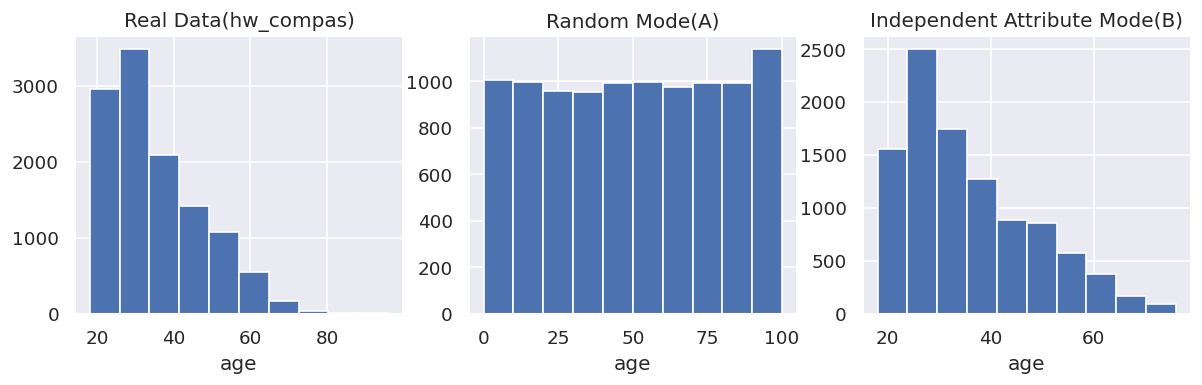

In [ ]:
# Your code here
fig, axes = plt.subplots(1,3,figsize = (12,3),dpi =120)
axes[0].hist(df_real['age'])
axes[0].set_xlabel('age')
axes[0].set_title('Real Data(hw_compas)')
axes[1].hist(df_real_A['age'])
axes[1].set_xlabel('age')
axes[1].set_title('Random Mode(A)')
axes[2].hist(df_real_B['age'])
axes[2].set_xlabel('age')
axes[2].set_title('Independent Attribute Mode(B)')

Text(0.5, 1.0, 'Independent Attribute Mode(B)')

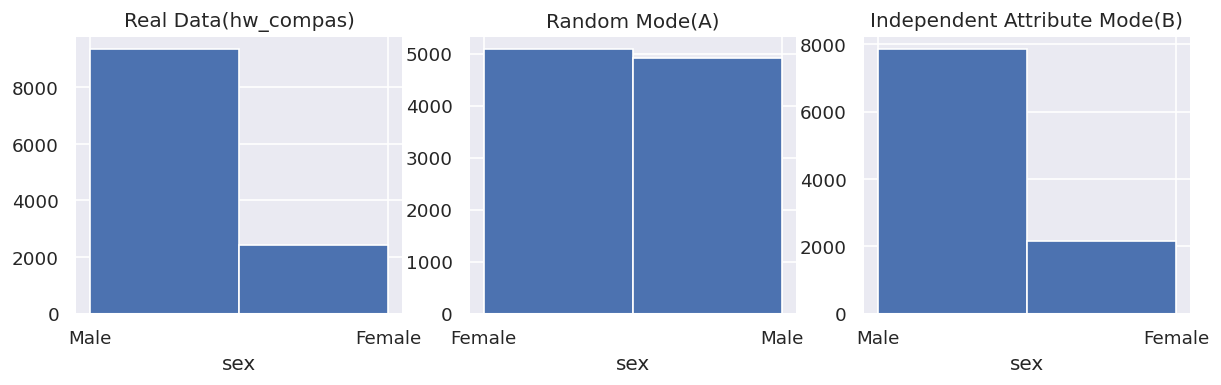

In [ ]:
fig, axes = plt.subplots(1,3,figsize = (12,3),dpi =120)
axes[0].hist(df_real['sex'],bins=2)
axes[0].set_xlabel('sex')
axes[0].set_title('Real Data(hw_compas)')
axes[1].hist(df_real_A['sex'],bins=2)
axes[1].set_xlabel('sex')
axes[1].set_title('Random Mode(A)')
axes[2].hist(df_real_B['sex'],bins=2)
axes[2].set_xlabel('sex')
axes[2].set_title('Independent Attribute Mode(B)')

Independent attribute mode (B) is more similar to real data than random mode (A). Random mode generate data with equal probability, so the age and sex distribution are more uniform. As we can observe from the plot, each group in age and sex has similar counts because they are assigned equal probability when random mode generates them. In comparison, independent attribute mode learns the sampling distribution of each feature indepedently, so the counts in each group are more similar to real data.


#### Two-sample Kolmogorov–Smirnov test for continous attributes

In [ ]:
def ks_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for Two-sample Kolmogorov–Smirnov test.
    """
    return ks_2samp(df_in[attr], df_out[attr])[0]

#### KL-divergence for categorical attributes

In [ ]:
def get_distribution_of_categorical_attribute(attribute: pd.Series, indicies=None):
    distribution = attribute.dropna().value_counts()
    if indicies is not None:
        for idx in set(indicies) - set(distribution.index):
            distribution.loc[idx] = 0
    distribution.sort_index(inplace=True)
    return distribution/sum(distribution)

def kl_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for KL-divergence.
    """
    distribution_in = get_distribution_of_categorical_attribute(df_in[attr])
    distribution_out = get_distribution_of_categorical_attribute(df_out[attr], distribution_in.index)
    return entropy(distribution_out, distribution_in)

In [ ]:
# Use KS test for age (numerical attribute)
ksa = ks_test(df_real, df_real_A,'age')
ksb = ks_test(df_real, df_real_B,'age')

# Use KL test for sex (categorical attribute)
kla = kl_test(df_real, df_real_A,'sex')
klb = kl_test(df_real, df_real_B,'sex')

# Print results
print('KS Test for Age Attribute:')
print('KS test result for synthetic data A:',ksa)
print('KS test result for synthetic data b:',ksb)

print('KL Divergence for Sex Attribute:')
print('KL divergence result for synthetic data A:',kla)
print('KL divergence result for synthetic data b:',klb)

KS Test for Age Attribute:
KS test result for synthetic data A: 0.3735091775112699
KS test result for synthetic data b: 0.026252445351705345
KL Divergence for Sex Attribute:
KL divergence result for synthetic data A: 0.22319792405369002
KL divergence result for synthetic data b: 0.0002494300869420041


Based on the results from Kolmogorov-Smirnov test and Kullback-Leibler divergence, B (independent attribute mode) seems to perform better than A ( random mode). KS test is used to test how similar two distributions are. The KS test statistics measures the biggest gap between the two distributions, so the smaller KS test result indicates more similarities between two datasets. In this sense, the smaller KS test result of B indicates that B has a more similar distribution to the real data, compared with A. On the other hand, KL divergence measures the difference between two distributions for categorical attribute. In this sense, the smaller KL divergence of B indicates a more similar distribution to the real datasets than A. Overall, since B performs better in both numerical and categorical attribute, it's more similar to the real data, which matches the histograms plots above.

### Q3

some more sophisticated statistical measure that’s good for correlated attribute mode, and will be better with k=2 (case D) than with k=1 (case C), __some distance over pairwise correlation coefficients? Also show the difference visually, comparing results on real vs. synthetic datasets__.

In [ ]:
# Use pairwise_attributes_mutual_information function.
# For function parameters, refer to https://github.com/DataResponsibly/DataSynthesizer/blob/master/DataSynthesizer/lib/utils.py#L31
# Your code here
pwf = pairwise_attributes_mutual_information(df_fake)
display(pwf)
pwfc = pairwise_attributes_mutual_information(df_fake_C)
display(pwfc)
pwfd = pairwise_attributes_mutual_information(df_fake_D)
display(pwfd)

,child_1,child_2,parent_1,parent_2
child_1,1.000000,0.211242,0.214345,0.195899
child_2,0.211242,1.000000,0.208301,0.200690
parent_1,0.214345,0.208301,1.000000,0.002421
parent_2,0.195899,0.200690,0.002421,1.000000


,child_1,child_2,parent_1,parent_2
child_1,1.000000,0.229400,0.070395,0.026739
child_2,0.229400,1.000000,0.249762,0.114695
parent_1,0.070395,0.249762,1.000000,0.028520
parent_2,0.026739,0.114695,0.028520,1.000000


,child_1,child_2,parent_1,parent_2
child_1,1.000000,0.074153,0.034209,0.221418
child_2,0.074153,1.000000,0.203135,0.110479
parent_1,0.034209,0.203135,1.000000,0.073704
parent_2,0.221418,0.110479,0.073704,1.000000


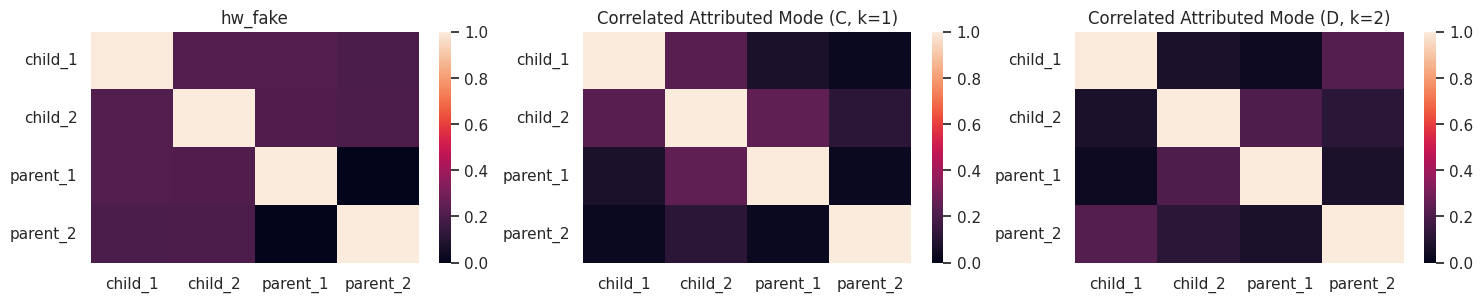

In [ ]:
# Use can sns.heatmap for pairwise mutual information
# For examples, refer to https://seaborn.pydata.org/generated/seaborn.heatmap.html
# Your code here
fig, axes = plt.subplots(1,3,figsize=(18,3))

sns.heatmap(pwf,vmin=0,vmax=1, ax=axes[0])
axes[0].set_title('hw_fake')
sns.heatmap(pwfc,vmin=0,vmax=1, ax=axes[1])
axes[1].set_title('Correlated Attributed Mode (C, k=1)')
sns.heatmap(pwfd,vmin=0,vmax=1, ax=axes[2])
axes[2].set_title('Correlated Attributed Mode (D, k=2)')
plt.show()

Mutual information measures how dependent two random variables are. Based on the heat, I think C (correlated attributed mode with k=1) perform better in preserving mutual information than D (coorelated attributed mode with k=2). As we can see, the color of heatmat of C is more similar to heatmap of hw_fake. K is the Bayesian network degree, which indicates the maximum number of parents any node in the Bayesian net can have. In this case, k=1 seems to better preserve mutual information.

## Part (b)

Study the variability in accuracy of answers to Q1 and Q2 for A, B and C: fix epsilon = 0.1, generate __10__ synthetic databases (by specifying different seeds).  Plot accuracy as a box-and-whiskers plot.  

In [ ]:
# You can use sns.boxplot for the plots
# For examples, refer to https://seaborn.pydata.org/generated/seaborn.boxplot.html
# Your code here
mean_A, mean_B, mean_C, median_A, median_B, median_C = [],[],[],[],[],[]
for seed in range(10):
  set_random_seed(seed)
  df_real_A_new = generate_data_A(real_data_file, output_data_size)
  df_real_B_new = generate_data_B(real_data_file, output_data_size, epsilon=0.1)
  df_real_C_new = generate_data_C(real_data_file, output_data_size, epsilon=0.1)
  mean_A.append(df_real_A_new['age'].mean())
  mean_B.append(df_real_B_new['age'].mean())
  mean_C.append(df_real_C_new['age'].mean())
  median_A.append(df_real_A_new['age'].median())
  median_B.append(df_real_B_new['age'].median())
  median_C.append(df_real_C_new['age'].median())
clear_output()

In [ ]:
mean_A_df = pd.DataFrame(mean_A)
mean_B_df = pd.DataFrame(mean_B)
mean_C_df = pd.DataFrame(mean_C)
mean_df = pd.concat([mean_A_df, mean_B_df, mean_C_df], axis=1)
mean_df.columns = ['A_age', 'B_age','C_age']
median_A_df = pd.DataFrame(median_A)
median_B_df = pd.DataFrame(median_B)
median_C_df = pd.DataFrame(median_C)
median_df = pd.concat([median_A_df, median_B_df, median_C_df], axis=1)
median_df.columns = ['A_age', 'B_age','C_age']

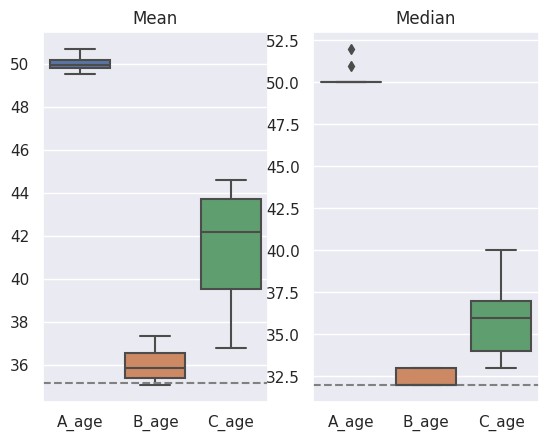

In [ ]:
#Plot
fig, axes = plt.subplots(1, 2)
sns.set(rc = {'figure.figsize':(18,8)})
sns.boxplot(data= mean_df, ax=axes[0])
axes[0].set_title('Mean')
l1=axes[0].axhline(df_real['age'].mean(),color='gray',ls='--')
sns.boxplot(data= median_df, ax=axes[1])
l2=axes[1].axhline(df_real['age'].median(),color='gray',ls='--')
axes[1].set_title('Median')
plt.show()

The dashed line is the ground truth (mean and median from the real data). Hence, based on the plots, B (independent attribute mode) performs the best because its results are the closest to the ground truth. A possible explanation is that indepedent attribute mode study the distribution of each feature independently and generates a distribution for age that is similar to the original distribution. Hence, when we use median or mean (dispersion statistics) to measure the performance, independent attribute mode will perform the best because its distribution or dispersion is learned from the age feature of real data. As for A (random mode), the distribution is uniform, so mean and median will be around 50 (0+100/2, based on the definition of uniform distribution). As for C (correlated attributed mode), since we are learning conditional probabilities and correlations, more noises will be involved in the model, so it'll be less accurate when we analyze individual feature that doesn't have much correlation such as age. Besides, among the three modes, A is the least variable through different seeds. The reason is that A will generate data randomly with equal probability every single run, so results will be pretty stable. In comparison, C is the most variable. One reason is that C
needs to learn the correlation every time, which involves more noises and is the most complex generating process. Hence, performance of C may vary more.

## Part (c)

Study how accuracy of Q3 changes for case **C**, as you vary __epsilon__ = [0.02, 0.04, 0.06, 0.08, 0.1].

In [ ]:
epsilons = [0.02,0.04,0.06,0.08,0.1]
klb_df = pd.DataFrame(columns = ['KL_Divergence', 'epsilon'])
klc_df = pd.DataFrame(columns = ['KL_Divergence', 'epsilon'])
kld_df = pd.DataFrame(columns = ['KL_Divergence', 'epsilon'])
for epsilon in epsilons:
  for seed in range(10):
    set_random_seed(seed)
    df_real_B_newb = generate_data_B(real_data_file, output_data_size, epsilon=epsilon)
    df_real_C_newb = generate_data_C(real_data_file, output_data_size, epsilon=epsilon)
    df_real_D_newb = generate_data_D(real_data_file, output_data_size, epsilon=epsilon)

    klb_df = klb_df.append({"KL_Divergence": kl_test(df_real, df_real_B_newb,'race'),"epsilon":epsilon},ignore_index = True)
    klc_df = klc_df.append({"KL_Divergence": kl_test(df_real, df_real_C_newb,'race'),"epsilon":epsilon},ignore_index = True)
    kld_df = kld_df.append({"KL_Divergence": kl_test(df_real, df_real_D_newb,'race'),"epsilon":epsilon},ignore_index = True)
clear_output()

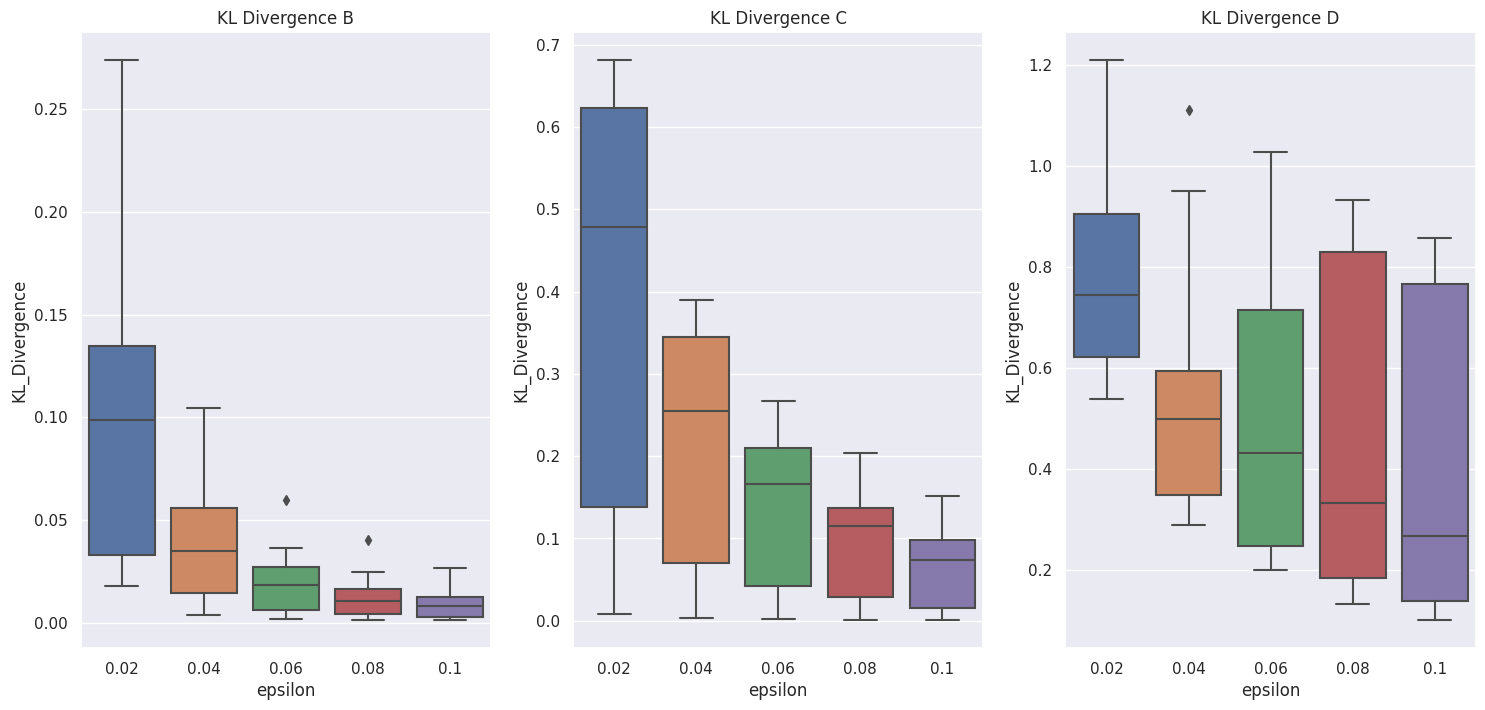

In [ ]:
fig, axes = plt.subplots(1, 3)
sns.set(rc = {'figure.figsize':(18,8)})
sns.boxplot(x='epsilon',y='KL_Divergence',data= klb_df, ax=axes[0]);
axes[0].set_title('KL Divergence B')
sns.boxplot(x='epsilon',y='KL_Divergence',data= klc_df, ax=axes[1]);
axes[1].set_title('KL Divergence C')
sns.boxplot(x='epsilon',y='KL_Divergence',data= kld_df, ax=axes[2]);
axes[2].set_title('KL Divergence D')
plt.show()

As for both B (independent attribute mode) and C (correlated attribute mode with k=1), the KL divergence is becoming smaller and smaller and becoming more and more stable across different runs as the epsilon values increase. However, as for C (correlated attribute mode with k=2), the KL divergence is becoming smaller and geting stable when epsilon increases from 0.02 to 0.04, but the KL divergence is more variable when the epsilon increases further though the mean KL divergence is getting smaller. One possible reason is that epsilon values greater than 0.04 are too big for C, so it creates too much noises for the model. Hence, C is showing more variability. As for the other two models, greater epsilon values may be helpful for the model to better fit the data because epsilon values are not too big yet. Also, we can also notice that B performs the best in getting the smallest KL divergence among the three. This can be explained by the same reason we used in part a) and b) that independent random mode can better learn distribution of individual feature.